# 21M.387 Fundamentals of Music Processing
## Music Representation

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
plt.rcParams['figure.figsize'] = (12, 4)


## Reading

Chapter 1.0 - 1.4 (pp 1 – 33)

<img src="images/book_cover.png" width=200>

## Introduction

Three types of music representation:
- Score / Sheet Music
- Symbolic - like MIDI
- Audio

_Actual music_ - composed, performed, imagined, is very a rich construct that is not _fully_ represetned by any of the above.

## Sheet Music

<img src="images/beeth5_piano_opening.png" width=400>

In [22]:
ipd.Audio("audio/beeth5_piano_intro.wav")

<img src="images/beeth5_orch_score.png" width=800>

In [23]:
ipd.Audio("audio/beeth5_orch_21bars.wav")

### Octaves Pitches, and Scales

- The importance of the Octave
- In Western music: divide the octave into 12 (mostly) even divisions
  - semitones
  - pitch classes
- The staff and clefs
- Examples of scales:
  - chromatic
  - major
  - minor
  - pentatonic
- Scientific Pitch Notation:
  - A4 = 440Hz
  - C4 = "middle C"

<img src="images/cleffs.png" width=400>
<img src="images/chromatic_notes.png" width=800>
<img src="images/c_major.png" width=400>
<img src="images/c_minor.png" width=400>


### Rhythm and Durations
Note shape indicates duration
<img src="images/note_durations.png" width=500 >

Rests
<img src="images/rest_durations.png" width=500>

Time signature informs the next larger rhythmic grouping: bars (or measures)
<img src="images/time_sig_and_bars.png" width=400>



### Secondary Markings
- Tempo: Beats Per Minute (BPM) and "length of beat"
- Dynamics
- Articulation
- Style

<img src="images/articulation_dynamics.png" width=650>


### Lead Sheets

- Notation is minimal.
- Chords written as symbols instead of individual notes.
- A huge amount of leeway is left to the performers.

<img src="images/straight_no_chaser.gif" width=650>

In [24]:
ipd.Audio("audio/monk_straight_no_chaser.mp3")

The score has a nice balance of specificity and room for interpretation. The amount of detail (in secondary markings) is dramatically different for different composers, different eras, etc...

## Symbolic Representation

By symbolic, we mean data corresponding to notes and other properties of a score that can be represented (and stored) digitally.

### Player Piano

The first such "digital" representation was the piano roll and player pianos from the 1920s

<img src="images/piano_roll.png" width=400>
<img src="images/player_piano.png" width=400>

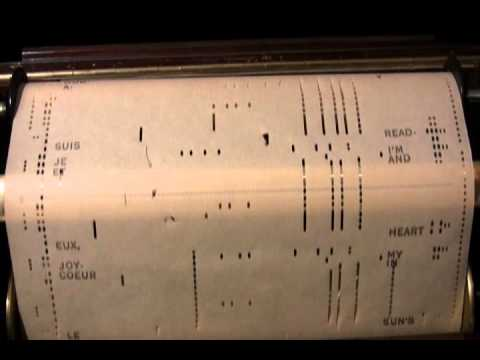

In [25]:
ipd.YouTubeVideo("ZXYslYDzF8o", width=900, height=600)

### MIDI

Musical Instrument Digital Interface.
- became popular in the 1980's as a way for controllers (keyboards) to communicate with synthesizers

<img src="images/midi_hookup.gif" width=650>

<img src="images/midi-cable.jpg" width=400>


MIDI is (by now) very old-school
- encodes messages for controlling synthesizers:
  - note on (including _velocity_)
  - note off
  - program change
  - pitch bend
  - volume, "mod wheel", etc...
- pretty low communication rate (by today's standards): 31kbs (k-bits per second). That's around 3-4 bytes per millisecond.

MIDI pitch numeric range:
- 0 (C-1) to 127 (G9)
- piano range is: A0 to C8 which is midi 21 to 108


### Midi File

SMF (Standard Midi File) encodes a bunch of MIDI messages with _timestamps_
- Tracks:
  - usually one track per channel (instrument)
  - conductor track - tempo, key signature, time signature messages
- Timestamps are in "delta ticks" (not seconds), with a fixed _Ticks Per Quarter_ (TPQ).
- Convention is ".mid" or ".midi" files
- Open standard binary format
- Often edited with MIDI editing programs like:
  - Reaper
  - Logic
  - Cubase
  - Garage Band
  
<img src="images/midifile.png" width=400>


In [26]:
# an example of a MIDI file - beat/bar aligned with detailed tempo track
import os
os.system("open midi/bach_prelude_fugue_C.mid");

In [27]:
# full orchestral version of beethoven 5
os.system("open midi/beeth5_orch.mid");

### Other formats

__Music XML__

<img src="images/music_xml.png" width=500>

__Music ABC Notation__

`X:1
T:Speed the Plough
M:4/4
C:Trad.
K:G
|:GABc dedB|dedB dedB|c2ec B2dB|c2A2 A2BA|
  GABc dedB|dedB dedB|c2ec B2dB|A2F2 G4:|
|:g2gf gdBd|g2f2 e2d2|c2ec B2dB|c2A2 A2df|
  g2gf g2Bd|g2f2 e2d2|c2ec B2dB|A2F2 G4:|
`

<img src="images/speed_the_plough.png" width = 600>

 

Symbolic (MIDI) vs Score:
- MIDI is more explicit than the score.
- MIDI can capture some secondary markings, or ignore them.
- Score allows musician to perform with interpretation. Can describe "composer's intent".


## Audio

The main focus of this class is music in the audio domain - recorded music.

Music in audio format is in some sense very rich. All the notes, dynamics, phrasings, instruments, and subtle musical interpretation are captured.

But in some sense it is very poor. All "higher level meaning" is removed when going from sheet music to produced sounds.


### Sound Waves

<img src="images/tuning_fork.png" width = 600>

These sound pressure waves are captured by a microphone, converted into an electrical signal, and digitized into a computer.

Let's record the audio wave produced by a piano and have a look

In [28]:
# launch audacity
os.system("open -a Audacity");

### Digitization

Digitization happens on two axes:
- time: sampling rate
- value: quantization factor

<img src="images/digitization.png" width=600>

The _sampling rate_ (or _sampling frequency_) $F_s$ is how often we sample the audio signal: $F_s$ samples per second or $F_s$Hz (Hertz).

The _sampling period_ is $T = 1/F_s$.

CD quality audio uses:
- 44,100 Hz (samples per second)
- 16 bits (65,536 values)

Telephone quality:
- 8,000 Hz
- 8 bits (256 values)

### Audio in python

Even though 16 bits of audio are "good enough", when we load and manipulate audio in python, it is useful to convert the 16 bit numbers into floating point number.

Let's look at the Beethoven recording, starting at time 15.5 seconds to 16.5 seconds.

In this recording, $F_s = 22050$.  
$t_1 = 15.5$ seconds  
$t_2 = 16.5$ seconds  

$n_1 = t_1 \cdot F_s$   
$n_2 = t_2 \cdot F_s$  


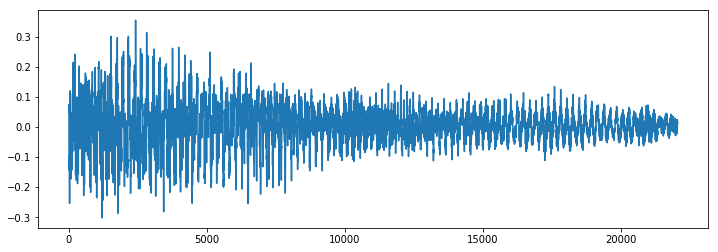

In [29]:
# beethoven example
x = load_wav("audio/beeth5_orch_21bars.wav")
fs = 22050

t1 = 15.5
t2 = 16.5

n1 = int(fs * t1)
n2 = int(fs * t2)

plt.figure()
plt.plot(x[n1:n2])
plt.show()

ipd.Audio(x[n1:n2], rate=fs)

### Modeling a Simple Tone

- Many physical sounding system can be modeled using a mass-spring system.
- This leads to _simple harmonic motion_ - in other words, __sine waves__:

$x(t) = A \sin(\omega t)$  
where  
$\omega = 2 \pi f$ and $f$ is the frequency of oscillation in Hz.

In the digital domain, we sample $x(t)$ at a _sampling interval_ of $T$ or a _sampling rate_ of $F_s = 1/T$. 

$t = nT = n/F_s$ for $n \in \{0,1,2...\}$  
and  
$x(n) = A \sin(\omega {n \over F_s} )$  


In [30]:
# create a tone:
fs = 44100 # sampling rate

def make_sine_tone(f, amp, dur) :
    t = np.arange(fs*dur) / float(fs)
    out = amp * np.sin(2 * np.pi * f * t)
    print 'A=%.4f f=%.2f' % (amp, f)
    return out

x = make_sine_tone(440, .1, 2)
ipd.Audio(x, rate=fs)

A=0.1000 f=440.00


### Pitch and Frequency

- Perceived pitch is strongly related to this oscillation frequency.
- This relationship between pitch and frequency is logarithmic!
  - Moving up one octave equates to doubling the frequency
  - _Adding_ 12 semitones equates to _multiplying_ the frequency by 2.
  
Using MIDI pitch (where A440 = midi 69).

$F(p) = 2^{(p-69)/12} \cdot 440$

For example:
- $F(69) = 440$Hz
- $F(57) = 220$Hz
- $F(60) = 261.62$Hz

This formulation is known as the _equal tempered scale_.  
Raising one semitone equates to multiplying by $f_{st} = 2^{1/12} \approx 1.05946$

We can also divide the octave in _cents_: 100 divisions per semitone, or 1,200 divisions per octave.

__Example of a tone series__

In [31]:
def make_tone_series(freqs):
    dur = 0.5
    amp = 0.1
    num_tones = len(freqs)
    len_t = int(fs * dur)
    out = np.zeros(len_t * num_tones)
    for i in range(num_tones):
        out[i*len_t:(i+1)*len_t] = make_sine_tone(freqs[i], amp, dur)
    return out

__Linear Frequency Steps__

In [32]:
freqs = 220 * np.arange(1, 11)
x = make_tone_series(freqs)
ipd.Audio(x, rate=fs)

A=0.1000 f=220.00
A=0.1000 f=440.00
A=0.1000 f=660.00
A=0.1000 f=880.00
A=0.1000 f=1100.00
A=0.1000 f=1320.00
A=0.1000 f=1540.00
A=0.1000 f=1760.00
A=0.1000 f=1980.00
A=0.1000 f=2200.00


__Multiplicative Frequency Steps__

In [33]:
freqs = 220 * (1.0594 ** np.arange(0, 10))
x = make_tone_series(freqs)
ipd.Audio(x, rate=fs)

A=0.1000 f=220.00
A=0.1000 f=233.07
A=0.1000 f=246.91
A=0.1000 f=261.58
A=0.1000 f=277.12
A=0.1000 f=293.58
A=0.1000 f=311.02
A=0.1000 f=329.49
A=0.1000 f=349.06
A=0.1000 f=369.80


### Instrumental Sounds

- Fundamental Frequency, $F_0$ (or first partial)
- Partials: set of sinusoidal vibrations of the instrument, in increasing order of frequency
- Harmonic sounds (strings, winds, brass instruments): partials are _integer multiples_ of the $F_0$, called _harmonics_.
- Inharmonic sounds (drums, bells): partials are not integer multiples of $F_0$

<img src="images/standingstring1.gif" width=600>
[source: http://resource.isvr.soton.ac.uk/spcg/tutorial/tutorial/StartCD.htm]

__Modeling Harmonic Instrumental Notes__

The first 10 modes of vibration:

In [34]:
f = 220
freqs = f * np.arange(1, 10)
x = make_tone_series(freqs)
ipd.Audio(x, rate=fs)

A=0.1000 f=220.00
A=0.1000 f=440.00
A=0.1000 f=660.00
A=0.1000 f=880.00
A=0.1000 f=1100.00
A=0.1000 f=1320.00
A=0.1000 f=1540.00
A=0.1000 f=1760.00
A=0.1000 f=1980.00


The same 10 modes, played simultaneously:

In [35]:
def make_tone(freqs, decay = 0.5) :
    dur = 3
    a = 1.0
    num_tones = len(freqs)
    time = np.arange(int(fs*dur)) / float(fs)
    out = np.zeros(len(time))
    for h in range(num_tones):
        out += make_sine_tone(freqs[h], a * (decay ** h), dur)
    return out

x = make_tone(freqs)
ipd.Audio(x, rate=fs)

A=1.0000 f=220.00
A=0.5000 f=440.00
A=0.2500 f=660.00
A=0.1250 f=880.00
A=0.0625 f=1100.00
A=0.0312 f=1320.00
A=0.0156 f=1540.00
A=0.0078 f=1760.00
A=0.0039 f=1980.00


### Loudness

Similarly to pitch / frequency, we perceive _loudness_ as the logarithm of _sound intensity_

- $intensity = {power \over area} $
- threshold of hearing = $I_{TOH} = 10^{-12} {W \over m^2}$ 
- We often talk about _intensity level_ in dB: $dB_I = 10 \cdot \log_{10}({I \over I_{TOH}})$

<img src="images/loudness_table.png" width=600>

The ear's dynamic range is __HUGE__: 1 to 1,000,000,000,000

Two terms often used for loudness measure:
- SIL = Sound Intensity Level (power per area)
- SPL = Sound Pressure Level (change in air pressure)

SPL is easy to measure: it's the output of the microphone - ie, the peaks of the waveform.

Intensity is proportional to the _square_ of amplitude: $I \propto A^2$

So:

$
\begin{align}
dB_I & = 10 \log_{10}\left({ I \over I_0}\right) \\
dB_A & = 10 \log_{10}\left({ A^2 \over A_0^2}\right) \\
     & = 20 \log_{10}\left({ A \over A_0}\right) \\
\end{align}
$

The decibel scale is used in audio engineering all the time.  
The rule of thumb is that "doubling the amplitude" increases the loudness by 6dB:

$20 \log_{10}(2.0) = 6.0206...$



__Loudness example__

This generates a series of tones with different peak amplitudes

In [ ]:
def make_amp_series(f, amps):
    dur = 0.5
    num_tones = len(amps)
    len_t = int(fs * dur)
    out = np.zeros(len_t * num_tones)
    for i in range(num_tones):
        out[i*len_t:(i+1)*len_t] = make_sine_tone(f, amps[i], dur)
    return out

In [ ]:
amps = np.linspace(.1, 1, 10)
x = make_amp_series(440, amps)
ipd.Audio(x, rate=fs)

In [ ]:
amps = 10 ** np.linspace(-2, 0, 10)
x = make_amp_series(440, amps)
ipd.Audio(x, rate=fs)

__Loudness Perception vs Pitch__

Our ears don't hear all frequencies the same. Our ears are more sensitive around some frequencies than others.
<img src="images/equal_loudness.png" width=600>


### Timbre

Defining timbre is elusive. Sometimes we use an anti-definition:
Timbre is difference in two sounds that have the same pitch, loudness, and duration.

So, it is difficult to mathematically characterize this perceptual concept.

Some things we can say are:
- The time evolution of a note is interesting. We sometimes simplify into 4 phases: _Attack_, _Decay_, _Sustain_, _Release_
- The attack phase contains interesting "note startup" elements such as noise and non-harmonic components. This is sometimes called a _transient_.
- The higher partials of instruments often exhibit slight inharmonicities.
- The sustained portion of a sound can have evolution in energies of partials. 

<img src="images/adsr.png" width = 400>

<img src="images/adsr_piano_violin.png" width = 600>

In [ ]:
ipd.Audio("audio/piano_c4.wav")

In [ ]:
ipd.Audio("audio/violin_c4_legato.wav")